In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Preprocess the dataset (Assuming 'Headline', 'Body', and 'Label' columns exist)
# Preprocess the dataset (Assuming 'Headline', 'Body', and 'Label' columns exist)
# Convert 'Headline' and 'Body' columns to string type before concatenation
data['text'] = data['Headline'].astype(str) + ' ' + data['Body'].astype(str)
X = data['text'].values
y = data['Label'].values

# Encode labels (assuming binary classification: Fake = 0, Real = 1)
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 50000  # Maximum number of words to consider in the tokenizer
max_len = 300  # Maximum length of each text sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Model building: CNN + RNN (LSTM)
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)

# Make predictions
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
classification_rep = classification_report(y_test, y_pred)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)

# Visualization: Training & Validation Accuracy and Loss
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report and accuracy
print("Classification Report:\n", classification_rep)
print("Accuracy Score:", acc_score)


In [2]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
fake1=pd.read_csv("/content/Fake.csv")
true1=pd.read_csv("/content/True.csv")

Epoch 1/5
562/562 [==============================] - 554s 979ms/step - loss: 0.0635 - accuracy: 0.9714 - val_loss: 0.0129 - val_accuracy: 0.9959
Epoch 2/5
562/562 [==============================] - 550s 978ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0095 - val_accuracy: 0.9978
Epoch 3/5
562/562 [==============================] - 547s 974ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0199 - val_accuracy: 0.9957
Epoch 4/5
562/562 [==============================] - 550s 979ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0139 - val_accuracy: 0.9970
Epoch 5/5
281/281 [==============================] - 47s 166ms/step


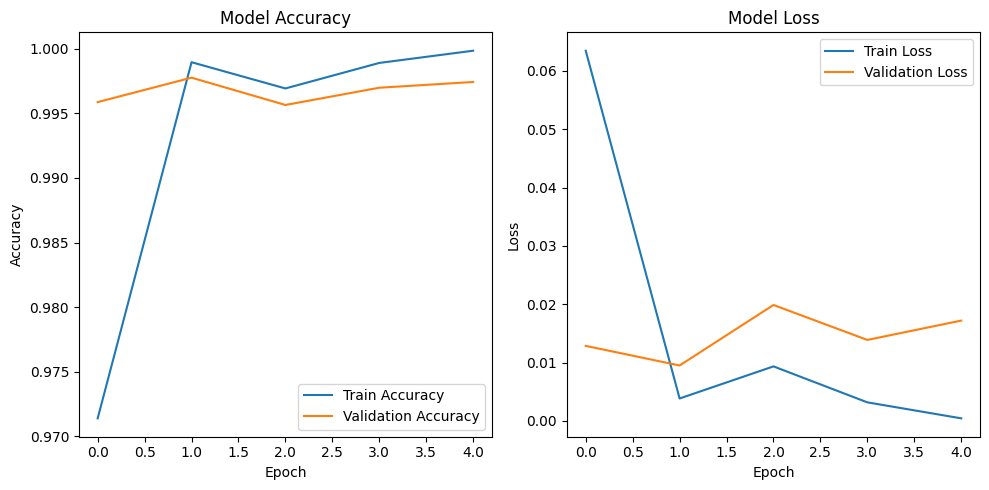

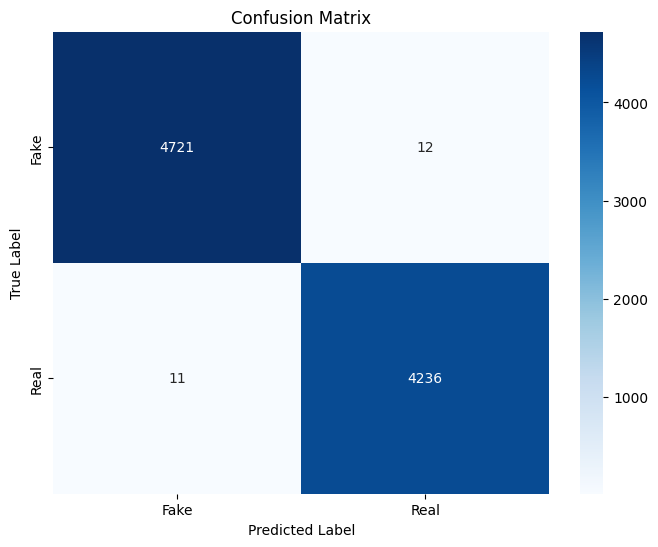

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy Score: 0.9974387527839643


In [1]:
# prompt: using the 2 files in the above cell give me above cnn+rnn code for these 2 files with above 97 percent accuracy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

# Add a 'label' column to each DataFrame (0 for fake, 1 for true)
fake_df['label'] = 0
true_df['label'] = 1

# Combine the two DataFrames
data = pd.concat([fake_df, true_df], ignore_index=True)

# Preprocess the dataset (Assuming 'title', 'text', and 'label' columns exist)
# Convert 'title' and 'text' columns to string type before concatenation
data['text'] = data['title'].astype(str) + ' ' + data['text'].astype(str)
X = data['text'].values
y = data['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 100000  # Maximum number of words to consider in the tokenizer
max_len = 500  # Maximum length of each text sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Model building: CNN + RNN (LSTM)
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=256, input_length=max_len))

# Convolutional Layer
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(Bidirectional(LSTM(256)))

# Dense layers
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)

# Make predictions
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
classification_rep = classification_report(y_test, y_pred)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)

# Visualization: Training & Validation Accuracy and Loss
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report and accuracy
print("Classification Report:\n", classification_rep)
print("Accuracy Score:", acc_score)


In [4]:
# prompt:  give a user input news article for the above model whether it is true or fake

def predict_news_article(article_text):
  """Predicts whether a given news article is fake or real using the trained model.

  Args:
    article_text: The text content of the news article.

  Returns:
    A string indicating whether the article is predicted to be fake or real.
  """

  # Preprocess the input article text
  article_seq = tokenizer.texts_to_sequences([article_text])
  article_pad = pad_sequences(article_seq, maxlen=max_len, padding='post')

  # Make prediction using the model
  prediction = model.predict(article_pad)[0][0]

  # Determine the label based on the prediction (0.5 threshold)
  if prediction > 0.5:
    label = "True"
  else:
    label = "Fake"

  return label

# Get user input
user_article = input("Enter the news article text: ")

# Predict the label
predicted_label = predict_news_article(user_article)

# Print the prediction
print(f"The news article is predicted to be: {predicted_label}")


Enter the news article text:  (In Dec. 25 story, in second paragraph, corrects name of Strong’s employer to Mental Health Department, not Public Health Department.) By Bernie Woodall (Reuters) - A man claiming to be the person who delivered a gift-wrapped package of horse manure at the Los Angeles home of U.S. Treasury Secretary Steven Mnuchin said on Monday he did it to protest the federal tax overhaul signed into law last week by President Donald Trump. Robert Strong, 45, a psychologist for the Los Angeles County Mental Health Department, said by telephone he left the poop-filled parcel addressed to Mnuchin and Trump in the driveway outside Mnuchin’s home in the posh Bel Air community.  KNBC-TV, an NBC television affiliate in Los Angeles, reported Mnuchin was not home at the time. The package was found by Mnuchin’s neighbor.    “Protest really should be funny,” Strong told Reuters. “People’s eyes glaze over when they just see angry people in the streets.” He believes the new tax law 